In [4]:
%matplotlib inline
import tensorflow as tf
import tensorflow.keras as K
from tensorflow.keras.datasets import mnist
from sklearn.preprocessing import normalize
import numpy as np
import matplotlib.pyplot as plt
from sklearn import manifold

# Afficher les GPUs

In [5]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
tf.debugging.set_log_device_placement(True)
logical_gpus = tf.config.experimental.list_logical_devices('GPU')
print("Num logical GPUs: ", len(tf.config.list_physical_devices('GPU')))

AttributeError: module 'tensorflow' has no attribute 'config'

# Recuperation des data

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
print(x_train.shape)

(60000, 28, 28)


In [5]:
n_classes = 10

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = x_train.reshape((x_train.shape[0],x_train.shape[1],x_train.shape[2], 1))
x_test = x_test.reshape((x_test.shape[0],x_test.shape[1], x_test.shape[2], 1))

y_train = K.utils.to_categorical(y_train, n_classes)
y_test = K.utils.to_categorical(y_test, n_classes)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(60000, 28, 28, 1)
(60000, 10)
(10000, 28, 28, 1)
(10000, 10)


# Construction d'un model d'autoencoder sequentiel test

In [13]:
encoding_dim = 10
input_shape = x_train.shape[1:]

encoder = K.Sequential([
    K.layers.InputLayer(input_shape),
    K.layers.Conv2D(64, (3,3), activation='relu'),
    K.layers.Conv2D(32, (3,3), activation='relu'),
    K.layers.Conv2D(10, (3,3), activation='relu'),
    K.layers.Flatten(),
    K.layers.Dense(encoding_dim, activation='sigmoid')

])

encoder.compile(optimizer='Adam' ,loss = 'categorical_crossentropy', metrics=['accuracy'])
encoder.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 32)        18464     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 22, 22, 10)        2890      
_________________________________________________________________
flatten_1 (Flatten)          (None, 4840)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                48410     
Total params: 70,404
Trainable params: 70,404
Non-trainable params: 0
_________________________________________________________________


In [14]:

history = encoder.fit(x_train, y_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, y_test))


Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 1/50
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing

Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
235/235 [==============================] - 2s 10ms/step - loss: 0.0328 - accuracy: 0.9890 - val_loss: 0.0517 - val_accuracy: 0.9834
Epoch 7/50
233/235 [============================>.] - ETA: 0s - loss: 0.0270 - accuracy: 0.9918Executing op RangeDataset in devic

Epoch 14/50
235/235 [==============================] - ETA: 0s - loss: 0.0128 - accuracy: 0.9954Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
235/235 [==============================] - 2s 10ms/step - loss: 0.0128 - accuracy: 0

235/235 [==============================] - 2s 10ms/step - loss: 0.0047 - accuracy: 0.9984 - val_loss: 0.0721 - val_accuracy: 0.9863
Epoch 22/50
235/235 [==============================] - ETA: 0s - loss: 0.0057 - accuracy: 0.9980Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ModelDataset in devi

Executing op ParallelMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
235/235 [==============================] - 2s 10ms/step - loss: 0.0045 - accuracy: 0.9984 - val_loss: 0.0719 - val_accuracy: 0.9868
Epoch 30/50
233/235 [============================>.] - ETA: 0s - loss: 0.0037 - accuracy: 0.9989Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in devi

Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
235/235 [==============================] - 2s 10ms/step - loss: 0.0017 - accuracy: 0.9994 - val_loss: 0.0769 - val_accuracy: 0.9872
Epoch 38/50
235/235 [==============================] - ETA: 0s - loss: 0.0063 - accuracy: 0.9979Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in devi

Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
235/235 [==============================] - 2s 10ms/step - loss: 0.0018 - accuracy: 0.9994 - val_loss: 0.0836 - val_accuracy: 0.9868
Epoch 46/50
235/235 [==============================] - ETA: 0s - loss: 0.0012 - accuracy: 0.9997Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in devi

# learning losses

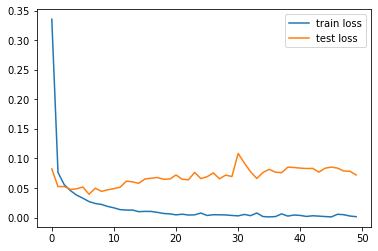

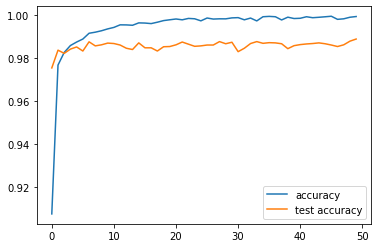

max accuracy reached is 98.90000224113464%


In [15]:
ax1, = plt.plot(history.history["loss"],label="train loss")
ax2, = plt.plot(history.history["val_loss"],label="test loss")
plt.legend(handles=[ax1, ax2])
plt.show()
ax1, = plt.plot(history.history["accuracy"],label="accuracy")
ax2, = plt.plot(history.history["val_accuracy"],label="test accuracy")
plt.legend(handles=[ax1, ax2])
plt.show()

print("max accuracy reached is {}%".format(np.max(history.history["val_accuracy"])*100))

# Save model

In [41]:
model_path = "models/encoder_test.h5"
encoder.save(model_path)
del encoder

# Load model

In [44]:
encoder = K.models.load_model(model_path)

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0


# Look at predictions

In [50]:
preds = encoder.predict_classes(x_test)
print(preds.shape)

Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
(10000,)


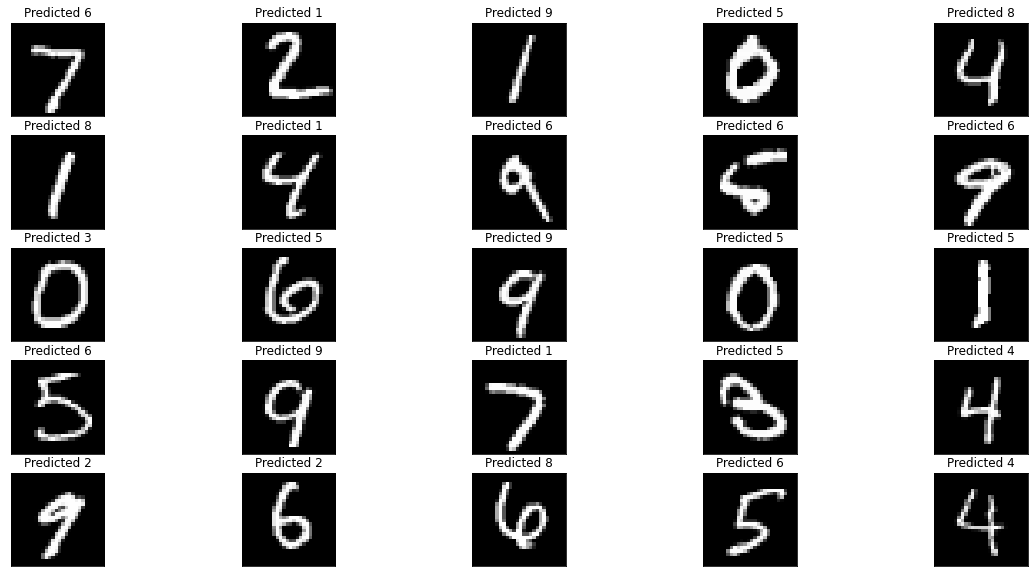

accuracy: 0.0


<ipython-input-51-8c2bbe923e45>:13: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  print("accuracy: {}".format(np.nonzero(preds == y_test)[0].shape[0]/y_test.shape[0]))


In [51]:
n=5
plt.figure(figsize=(20,10))
for i in range(n*n):
    # Display image
    ax = plt.subplot(n, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_title("Predicted {}".format(preds[np.random.randint(preds.shape[0])]))

plt.show()
print("accuracy: {}".format(np.nonzero(preds == y_test)[0].shape[0]/y_test.shape[0]))

# Looking at the latent space

Computing latent space projection...
Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ConcatV2 in device /job:localhost/replica:0/task:0/device:GPU:0
Computing t-SNE embedding...
Plotting t-SNE visualization...


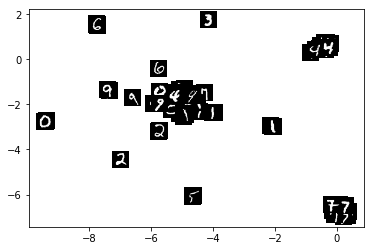

In [37]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import cv2

# Scatter with images instead of points
def imscatter(x, y, ax, imageData, zoom):
    images = []
    for i in range(len(x)):
        x0, y0 = x[i], y[i]
        # Convert to image
        img = imageData[i]*255.
        img = img.astype(np.uint8).reshape([28,28])
        img = cv2.cvtColor(img,cv2.COLOR_GRAY2RGB)
        # Note: OpenCV uses BGR and plt uses RGB
        image = OffsetImage(img, zoom=zoom)
        ab = AnnotationBbox(image, (x0, y0), xycoords='data', frameon=False)
        images.append(ax.add_artist(ab))
    
    ax.update_datalim(np.column_stack([x, y]))
    ax.autoscale()


# Show dataset images with T-sne projection of latent space encoding
def computeTSNEProjectionOfLatentSpace(X, encoder, display=True):
    # Compute latent space representation
    print("Computing latent space projection...")
    X_encoded = encoder.predict(X)

    # Compute t-SNE embedding of latent space
    print("Computing t-SNE embedding...")
    tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
    X_tsne = tsne.fit_transform(X_encoded)
    if display:
        # Plot images according to t-sne embedding
        print("Plotting t-SNE visualization...")
        fig, ax = plt.subplots()
        imscatter(X_tsne[:, 0], X_tsne[:, 1], imageData=X, ax=ax, zoom=0.6)
        plt.show()
    return X_tsne
    
X_tsne = computeTSNEProjectionOfLatentSpace(x_test[:100], encoder, display=True)

# Loading Darters